<b> Author: Sami Mwanje, mm223kk@student.lnu.se </b>

In [594]:
import numpy as np
import  pandas as pd
from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap
from matplotlib import pyplot as plt
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from numpy.random import default_rng

The numpy library is used to handle matrixes.

Pandas used for read the csv file.

Sklearn is used for DecisionTreeClassifier.

Matplotlib is used for the plots.

In [595]:
bm = np.asarray(pd.read_csv('bm.csv', delimiter=',')) # Read the bm data file.
np.random.shuffle(bm)          # Shuffle rows in bm
#Divide the dataset into X and y.
X, y = np.array(bm[:,:2]), np.array(bm[:,2])

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.50) # 50% training and 50% test

Reads the bm.csv data file X,y and divides the data into training and test set.

<b> Exercise 3.4:  Ensemble of Batman Trees

a) The estimate of the generalization error using the test set of the ensemble of 100 decision trees. </b>

In [596]:
trees = 100                                 # Number of tree that are going to run.
def randomForest(xTrain, yTrain, preSet): 
    rng = np . random . default_rng ()
    trainSize =  xTrain.shape[0]                  # Number of X's in in set.
    testSize = preSet.shape[0]
    r = np . zeros ([trainSize ,trees] , dtype = int )
    XX = np . zeros ([trainSize ,2 ,trees])
    YY = np . zeros ([trainSize ,trees])
    # Create random X and Y data sets.
    treesPredictions = np.zeros([trees,testSize])                           # Result of current tree prediction.
    clf = DecisionTreeClassifier()  # Create Decision Tree classifer object
    prediction = []
    for i in range (trees) :
        r [: , i] = rng . choice (trainSize, size = trainSize , replace = True )
        XX [: ,: , i] = xTrain [r [: , i], :]                      #Generate random X's for random trees.
        YY [: , i] = yTrain [r [: , i]]                            #Generate random Y's for random trees.
        clf = clf.fit(XX [: ,: , i], YY[: , i])                     #Train Decision Tree Classifer
        y_pred = np.array(clf.predict(preSet).astype(int))          # Predict value for for all X's in X_test for current tree.
        treesPredictions[i] = y_pred                                # Add the current result to current result array.

    for index in  range (testSize):
        votes = []
        for x in range (trees) :
            votes.append(treesPredictions[x][index])                 # Make a vote for current x-index in each tree.

        # Majority vote counting.
        one = np.count_nonzero(votes)                                # Count the ones
        zero = trees  - one                                          # Count the zeros.
        if one > zero:
            prediction.append(1)                                     # If one got the majority of the votes.
        else: 
            prediction.append(0)                                    # If zero got the majority of the votes.
    return prediction, XX,YY                                               # Return the predicted array.
    
    
prediction, XX,YY  = randomForest(X_train, y_train ,X_test)
n = len(prediction)
voteErrors = round(1 - np.count_nonzero(prediction == y_test[0:n])/n,5) # Generalization error of majority.
print("Generalization error using ensemble of 100 decision trees:",voteErrors)

Generalization error using ensemble of 100 decision trees: 0.0208


Creating random decison trees, and predicts each X for the test set. Each X then paricipates in a majority vote of 100 decision trees, which decides its final value.

The result here is always around 2 %.

<b> b) The average estimated generalization error of the individual decision trees.</b>

In [597]:
def randomForestB(preSet,secondRun = False, XX = XX, YY = YY):
    clf = DecisionTreeClassifier()  # Create Decision Tree classifer object
    errors = 0
    result = []
    for i in range (trees) :
        clf = clf.fit(XX [: ,: , i], YY [: , i])     # Train Decision Tree Classifer
        #Predict the response for test dataset
        y_pred = clf.predict(preSet)
        # Model Accuracy, how often is the classifier correct?
        result.append(y_pred)
        if secondRun == False:
            errors += metrics.mean_absolute_error(y_test, y_pred)
    return result,errors
result, errors = randomForestB(X_test)
print("Generalization error of the individual decision trees:", round(errors/trees,5))

Generalization error of the individual decision trees: 0.03354


Each decision tree makes a prediction of the data set. All the 100 trees prediction error rates are summurized and then averaged by all the 100 decision trees. 

The result here is always around 3 %.

<b> c) A plot of the decision boundaries of all the models , and including the ensemble model (c.f Figure 3). </b>

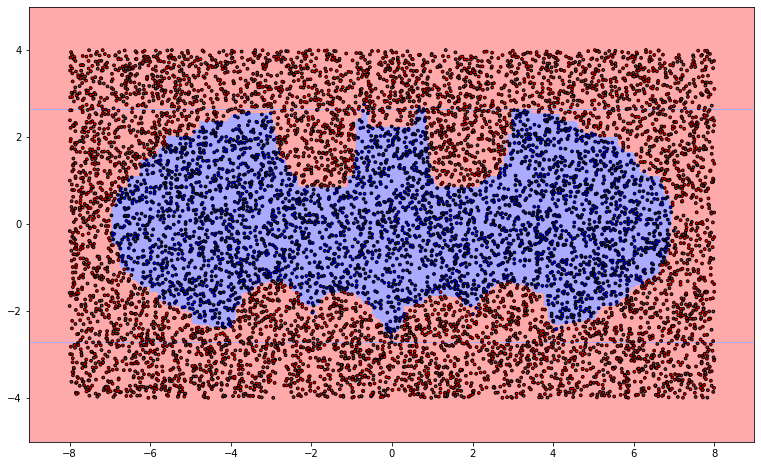

Plots of the decision boundaries of 100 decision trees.


In [598]:
#A plot of the decision boundaries of all the models ,
h = 0.02                                                  
# The size determines the granularity of the grid.
x1_min, x1_max = X[:,0].min()-1, X[:,0].max()+1                     # Get the min and max x-value. 
x2_min, x2_max = X[:,1].min()-1, X[:,1].max()+1                     # Get the min and max y-value.
xx, yy = np.meshgrid(np.arange(x1_min, x1_max, h),np.arange(x2_min, x2_max, h)) # Mesh Grid.
cordinates = np.c_[xx.ravel(), yy.ravel()]                                                  # Turn to two Nx1 arrays.

#  predict each mesh point
Z, XX,YY = randomForest(X,y,cordinates)       
Z = np.array(Z)                                                    # Predict and fit using implemented model.
clz_mesh = Z.reshape(xx.shape)                      # return to mesh format, compare y with y_pred

# Create mesh plot color
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
plt.figure(figsize=(13, 8)) #Fig size.
plt.pcolormesh(xx, yy, clz_mesh, cmap=cmap_light,shading='auto')
plt.scatter(X[:,0], X[:,1], c=y , marker=".",cmap=cmap_bold, s=30, edgecolor='k')
plt.show(block=False)
print("Plots of the decision boundaries of 100 decision trees.")

Reslut from predicting using the majority vote from each decion tree.

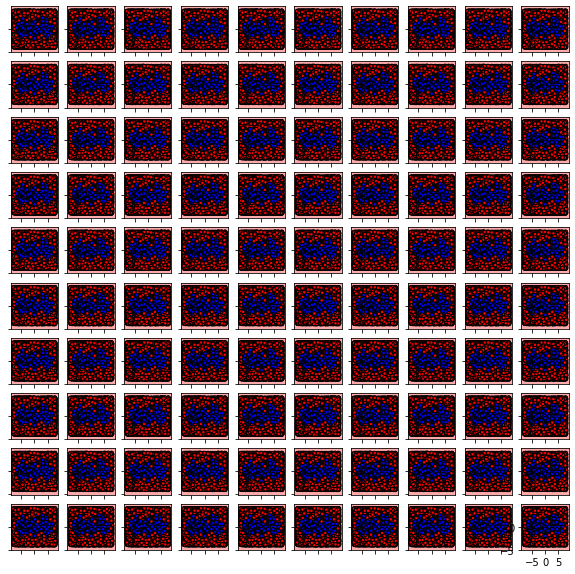

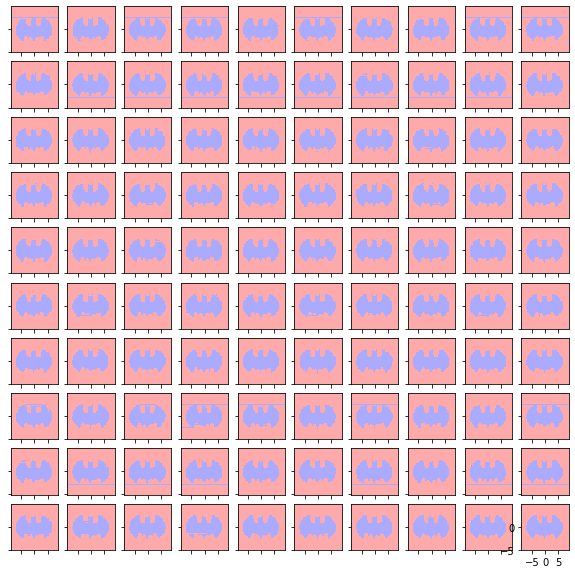

Plots of the esemble of 100 decision trees.


In [599]:
Z = np.array(randomForestB(cordinates, secondRun = True, XX =XX, YY = YY)[0])       # Run rediction of each tree and fit using implemented model.
#  A plot of the decision boundaries of all the models.
plt.figure(figsize=(10, 10)) #Fig size.
for i in range(len(Z)):
    ax = plt.gca()
    ax.axes.xaxis.set_ticklabels([])    # Remove X ticks.
    ax.axes.yaxis.set_ticklabels([])    # Remove Y ticks.
    clz_mesh = Z[i].reshape(xx.shape)   # Set reshapee to current tree.
    plt.subplot(10, 10, i+1)
    plt.pcolormesh(xx, yy, clz_mesh, cmap=cmap_light,shading='auto')
    plt.scatter(X[:,0], X[:,1], c=y , marker=".",cmap=cmap_bold, s=50, edgecolor='k')
plt.show(block=False)

#And including the ensemble model (c.f Figure 3).
plt.figure(figsize=(10, 10)) #Fig size.
for i in range(len(Z)):
    ax = plt.gca()
    ax.axes.xaxis.set_ticklabels([])    # Remove X ticks.
    ax.axes.yaxis.set_ticklabels([])    # Remove Y ticks.
    clz_mesh = Z[i].reshape(xx.shape)   # Set reshapee to current tree.
    plt.subplot(10, 10, i+1)
    plt.pcolormesh(xx, yy, clz_mesh, cmap=cmap_light,shading='auto')
    #plt.scatter(X[:,0], X[:,1], c=y , marker=".",cmap=cmap_bold, s=50, edgecolor='k')
plt.show(block=False)
print("Plots of the esemble of 100 decision trees.")

<b> d) Finally, a short comment on the results. Was it expected? Surprising? Do you see any benefits,
downsides with this method? </b>

The first thing we notice is that the ensemble of 100 decision trees has a less error rate than a generalization error of the individual decision trees. The ensemble of 100 decision  trees is always around 2 % while individual decision trees gives an error around 3 %.

For an explaination to why the esemble of 100 decision trees is better than individual decision trees we have to take a look on how the prediction is done. 

The esemble of 100 decision trees, predicts the test set tree by tree. Though the predictions are done the official values are not decided yet. Here a majority vote is first done by each decision tree, the wining value for each X is the one that will be predicited, and officaly used.

The individual decision tree predicts the test set without any further investigation.

Since the decion tree a generated randomly, some trees can be more prone to error than others. There fore an esemble of 100 decision trees (majority vote) gives a better result than an individual.

In the plots we can see that the esemble model is almost perfect as one. While we can find some errors in some tree inside the plot of the 100 decion trees.

 The result was the expected since a majority vote is like experts discussing an answer to a question. The downside with the majority vote is that the alogrithm can be time and power consuming. Some times even a random single decision tree can have a very good result which perform almost as good as the random forest.